In [21]:
import psycopg2
from faker import Faker
import random
import pandas as pd
import matplotlib.pyplot as plt

Делаем рандомную строку

In [22]:
fake = Faker()

f_nm = fake.name()
f_nm = "'" + f_nm + "'"

f_rate =round(min(random.random() * 8, 5.0), 2)

f_dt = fake.date()

while (True):
  if (f_dt[0] == '2' and f_dt[1] == '0' and f_dt[2] == '2' and f_dt[3] == '3'):
    break
  else:
    f_dt = fake.date()

f_bank_number = random.randint(10000000, 99999999)

fake_query = "INSERT INTO project.driver (driver_nm, mark_rate, license_valid_to_dt, bank_acc_number)" + " VALUES (" + str(f_nm) + ", " + str(f_rate) + ", " + "TO_DATE('" + str(f_dt) + "', 'YYYY-MM-DD'" + "), " + str(f_bank_number) + ");"

print(fake_query)

INSERT INTO project.driver (driver_nm, mark_rate, license_valid_to_dt, bank_acc_number) VALUES ('Jonathan Lin', 3.82, TO_DATE('2023-01-27', 'YYYY-MM-DD'), 23247829);


In [23]:
my_connection = psycopg2.connect (
  database="postgres",
  user="postgres",
  password="postgres",
  host="localhost",
  port="5432"
)

print("database oppened")

cur = my_connection.cursor()

cur.execute(fake_query)

cur.execute(''' 
    SELECT *
    FROM project.driver;
''')

rows = cur.fetchall()

for row in rows:
  print("driver_id =", row[0])
  print("driver_nm=", row[1])
  print("mark_rate=", row[2])
  print("license_valid_to=", row[3])
  print("banc_acc_number=", row[4], "\n")


database oppened
driver_id = 2
driver_nm= Петров Петр Петрович
mark_rate= 4.2
license_valid_to= 2023-11-15
banc_acc_number= 9876543 

driver_id = 3
driver_nm= Сидоров Сидор Сидорович
mark_rate= 4.8
license_valid_to= 2023-09-30
banc_acc_number= 2468135 

driver_id = 4
driver_nm= Кузнецова Анна Викторовна
mark_rate= 4.6
license_valid_to= 2024-02-28
banc_acc_number= 1357908 

driver_id = 5
driver_nm= Крылов Максим Игоревич
mark_rate= 4.9
license_valid_to= 2022-12-31
banc_acc_number= 8642135 

driver_id = 6
driver_nm= Морозова Екатерина Олеговна
mark_rate= 4.3
license_valid_to= 2023-07-20
banc_acc_number= 9753108 

driver_id = 7
driver_nm= Александров Сергей Викторович
mark_rate= 4.7
license_valid_to= 2024-06-15
banc_acc_number= 3692581 

driver_id = 8
driver_nm= Белов Денис Андреевич
mark_rate= 4.2
license_valid_to= 2023-11-01
banc_acc_number= 7418529 

driver_id = 9
driver_nm= Дмитриев Владислав Юрьевич
mark_rate= 4.5
license_valid_to= 2022-10-10
banc_acc_number= 2581473 

driver_id = 10

график кол-ва водителей с рейтингом в разных диапазонах

Text(0.5, 0, 'Рейтинг')

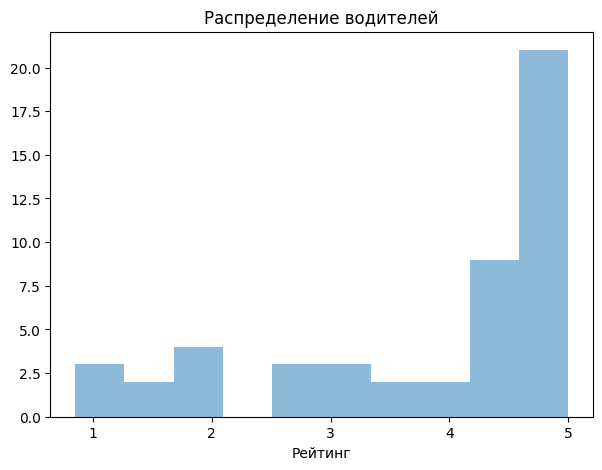

In [24]:
columns=["driver_id", "driver_nm", "mark_rate", "license_valid_to_dt", "bank_acc_number"]
df = pd.DataFrame(columns = columns)


# for row in rows:
#   if (row[2] < 1.0):
#     df["[0.0 - 1.0)"] += 1
#   if (row[2] >= 1.0 and row[2] < 2.0):
#     df["[1.0 - 2.0)"] += 1
#   if (row[2] >= 2.0 and row[2] < 3.0):
#     df["[2.0 - 3.0)"] += 1
#   if (row[2] >= 3.0 and row[2] < 4.0):
#     df["[3.0 - 4.0)"] += 1
#   if (row[2] >= 4.0 and row[2] < 5.0):
#     df["[4.0 - 5.0]"] += 1
for row in rows:
    df = pd.concat(
        [df, pd.DataFrame.from_dict(dict(zip(columns, list(map(lambda x: [x], row)))))],
        ignore_index=True
    )

plt.figure(figsize=(7, 5))
plt.hist(df["mark_rate"], bins = 10, alpha=0.5)
plt.title("Распределение водителей")
plt.xlabel("Рейтинг")


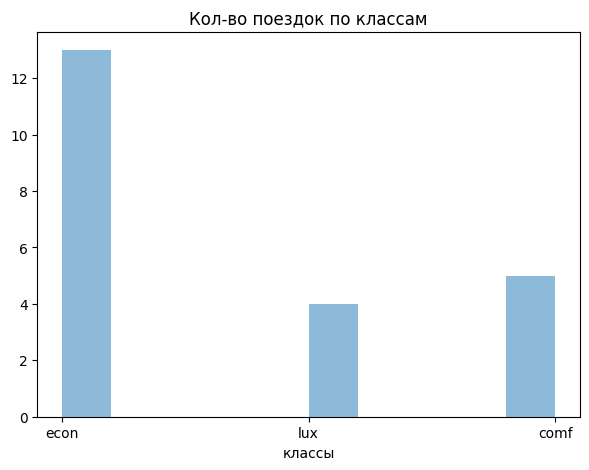

In [25]:
cur.execute(''' 
    SELECT DISTINCT trip_id, tar.class
    FROM project.trip t
    JOIN project.rental_car c ON t.car_id = c.car_id
    JOIN project.tariff tar ON c.brand_nm = tar.brand_nm AND now() <= tar.valid_to_dt;
''')
rows = cur.fetchall()

columns1=["trip_id", "class"]
df1 = pd.DataFrame(columns = columns1)

for row in rows:
    df1 = pd.concat(
        [df1, pd.DataFrame.from_dict(dict(zip(columns1, list(map(lambda x: [x], row)))))],
        ignore_index=True
    )

plt.figure(figsize=(7, 5))
plt.hist(df1["class"], bins = 10, alpha=0.5)
plt.title("Кол-во поездок по классам")
plt.xlabel("классы")


my_connection.commit()
my_connection.close()

Думаю, если побольше покликать на кнопку генерации данных, можно увидеть плотность распределения величины 
min(random.random() * 8, 5.0)